# 🏏 PSL Commentary & Historical Analysis (2016–2025)

This notebook presents a comprehensive analysis of **Pakistan Super League (PSL) matches** across ten seasons (2016–2025), integrating numerical performance, historical milestones, and commentary-based sentiment insights.  

<center>
  <img src="Cricket_Analysis_Title_Photo.jpg" alt="Cricket Analysis Title" width="700"/>
  <br>
  <em>The PSL has become one of the most exciting cricket leagues in the world, blending international stars with emerging Pakistani talent, while also offering a rich dataset for historical and sentiment analysis.</em>
</center>

_The PSL has become one of the most exciting cricket leagues in the world, blending international stars with emerging Pakistani talent, while also offering a rich dataset for historical and sentiment analysis._  

---
# 🔎 Research Questions  
This analysis investigates the **Pakistan Super League (PSL)** with a focus on match performance, commentary sentiment, and recruiter-ready insights. The main research questions are:  

**Research Question 1:** Player Mentions vs Performance  
- Which players are mentioned most frequently in commentary across all seasons?  
- Do most-mentioned players also perform strongly in PSL 2025?  


**Research Question 2:** Topic Modeling of Commentary  
- What themes and topics dominate commentary at the innings level?  
- How do these topics vary across matches and seasons?  


**Research Question 3:** Deep Historical Analysis (2016–2025)  
- How have batting and team performances evolved across PSL seasons?  
- What long-term trends emerge in runs, balls, and match outcomes?  


**Research Question 4:** Wordcloud of PSL 2025 Commentary  
- Which words and phrases were most frequently used in PSL 2025 commentary?  
- What do these frequent words reveal about match highlights and fan focus?  


**Research Question 5:** Season-wise Average Scores  
- How have average match scores changed across PSL seasons from 2016 to 2025?  
- Do scoring trends indicate more aggressive batting over time?  


**Research Question 6:** Most Successful Teams (Unique Matches)  
- Which PSL teams have won the most matches between 2016–2025?  
- How does match-winning consistency vary across franchises?  


**Research Question 7:** Top Run Scorers  
- Who are the top run scorers in PSL history (2016–2025)?  
- How do leading batters compare in total runs scored?  

**Research Question 8:** Most Successful Teams by Titles  
- Which teams have secured the most PSL titles between 2016–2025?  
- How does title-winning dominance reflect team strength?  

**Research Question 9:** Top Wicket Takers  
- Who are the leading wicket-takers in PSL history (2016–2025)?  
- How do they compare in total dismissals achieved?  


**Research Question 10:** Player of the Match Leaders  
- Which players have received the most “Player of the Match” awards?  
- Do these awards align with overall batting or bowling dominance?  


**Research Question 11:** Top Venues by Matches Played  
- Which venues have hosted the most PSL matches?  
- How do these venues contribute to PSL’s history and fan experience?  


## 📂 Dataset Sources

The datasets used in this notebook were downloaded from Kaggle:

1. **PSL Complete Dataset (2016–2025)**  
   - Contains **ball-by-ball score records** and match-level data.  
   - [Kaggle Link](https://www.kaggle.com/datasets/zeeshanahmad124586/psl-complete-dataset-2016-2025)

2. **PSL 2025 Commentary Data**  
   - Includes commentary with ball-by-ball context.  
   - [Kaggle Link](https://www.kaggle.com/datasets) *(replace with your specific dataset URL)*

3. **AFINN Lexicon for Sentiment Analysis**  
   - Used to score commentary sentiment.  
   - [AFINN-111.csv](https://github.com/fnielsen/afinn)

---
## 🧰 Tools & Technologies Used  

- **Programming Languages**: R (tidyverse, data.table, ggplot2, topicmodels)  
- **Data Wrangling**: `dplyr`, `lubridate`, `janitor`  
- **Text Analysis**: `tidytext`, `AFINN Lexicon`, `wordcloud`  
- **Visualization**: `ggplot2`, `plotly`, `viridis`  
- **Machine Learning**: `caret`, `randomForest`, `glmnet`  
- **Utilities**: `zip`, `zoo`, `kableExtra`

## 0️⃣ Package Setup  
Install & load packages for data wrangling, scraping, text processing, visualization, modeling, and utilities.  


In [3]:
packages <- c(
  "dplyr", "purrr", "tidytext", "ggplot2", "wordcloud", "viridis", "readr", "scales",
  "data.table", "lubridate", "stringr", "rvest", "httr", "jsonlite",
  "textstem", "topicmodels", "textdata",
  "plotly", "caret", "randomForest", "glmnet", "broom",
  "janitor", "kableExtra", "zip", "zoo"
)

# Install missing packages
installed <- packages %in% rownames(installed.packages())
if (any(!installed)) {
  install.packages(packages[!installed], dependencies = TRUE)
}

# Load all packages
invisible(lapply(packages, library, character.only = TRUE))

# Optional: set global options
options(stringsAsFactors = FALSE)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: RColorBrewer

Loading required package: viridisLite


Attaching package: 'scales'


The following object is masked from 'package:readr':

    col_factor


The following object is masked from 'package:viridis':

    viridis_pal


The following object is masked from 'package:purrr':

    discard



Attaching package: 'data.table'


The following object is masked from 'package:purrr':

    transpose


The following objects are masked from 'package:dplyr':

    between, first, last



Attaching package: 'lubridate'


The following objects are masked from 'package:data.table':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from 'package:base':

    date, intersect, setdiff, union



Attaching pac

## 1️⃣ User Configuration  
Set file paths (datasets, commentary URLs, outputs). Create output directory if missing.  

---

In [4]:
ball_by_ball_path <- "PSL Complete Dataset (2016-2025).csv"  # <-- your file name (as provided)
commentary_urls <- c(  # EXACT 5 commentary URLs (will scrape BOTH innings explicitly)
  "https://www.espncricinfo.com/series/pakistan-super-league-2025-1434269/islamabad-united-vs-lahore-qalandars-1st-match-1475238/ball-by-ball-commentary",
  "https://www.espncricinfo.com/series/pakistan-super-league-2025-1434269/karachi-kings-vs-islamabad-united-10th-match-1475247/ball-by-ball-commentary",
  "https://www.espncricinfo.com/series/pakistan-super-league-2025-1434269/islamabad-united-vs-quetta-gladiators-qualifier-1-1475268/ball-by-ball-commentary",
  "https://www.espncricinfo.com/series/pakistan-super-league-2025-1434269/islamabad-united-vs-multan-sultans-7th-match-1475244/ball-by-ball-commentary",
  "https://www.espncricinfo.com/series/pakistan-super-league-2025-1434269/islamabad-united-vs-peshawar-zalmi-5th-match-1475242/ball-by-ball-commentary"
)
outdir <- "psl_deep_analysis_outputs"
dir.create(outdir, showWarnings = FALSE)

## 2️⃣ Helper Functions  
Utility helpers: clean column names, safe CSV/HTML read, extract IDs from URLs.  

---

In [5]:
clean_colnames <- function(df) {
  colnames(df) <- colnames(df) %>% tolower() %>% str_replace_all("[ /-]+", "_") %>% str_trim()
  df
}

safe_read_csv <- function(path) {
  if (!file.exists(path)) stop("File not found: ", path)
  df <- read_csv(path, show_col_types = FALSE)
  clean_colnames(df)
}

safe_read_html <- function(url, tries = 3) {
  for (i in seq_len(tries)) {
    try({ pg <- read_html(url); return(pg) }, silent = TRUE)
    Sys.sleep(0.5)
  }
  return(NULL)
}

extract_ids_from_url <- function(u) {
  # digits in url (single-escaped in R strings)
  nums <- str_extract_all(u, "\\d{6,8}")[[1]]
  if (length(nums) >= 2) return(list(seriesId = nums[1], matchId = nums[2]))
  if (length(nums) == 1) return(list(seriesId = NA, matchId = nums[1]))
  return(list(seriesId = NA, matchId = NA))
}

## 3️⃣ Load PSL Ball-by-Ball Dataset  
Load & standardize historical PSL data (2016–2025). Ensure `match_id`, `delivery_id`, and summary stats.  

---

In [9]:
message("Loading ball-by-ball dataset: ", ball_by_ball_path)
psl_bb <- safe_read_csv(ball_by_ball_path)
message("Raw rows: ", nrow(psl_bb), ", columns: ", paste(colnames(psl_bb), collapse = ", "))

# Normalize some likely column names
psl_bb <- psl_bb %>% clean_names()

# Ensure columns we expect exist (attempt to detect variations)
if (!"match_id" %in% colnames(psl_bb)) {
  # try to create a match identifier from season/team/date if necessary
  if (all(c("team1","team2","date") %in% colnames(psl_bb))) {
    psl_bb <- psl_bb %>% mutate(match_id = paste0(team1, "_vs_", team2, "_", as.character(date)))
  } else {
    # fallback: create synthetic match id by grouping
    psl_bb <- psl_bb %>% mutate(match_id = as.character(match_id))
    psl_bb <- psl_bb %>% group_by(season) %>% mutate(match_id = paste0("m", as.integer(factor(match_id, levels=unique(match_id))))) %>% ungroup()
  }
}

# standardize runs / dismissal fields
possible_runs_cols <- c("runs","runs_total","total_runs","batsman_runs","total")
runs_col <- intersect(possible_runs_cols, colnames(psl_bb))[1]
if (is.na(runs_col)) stop("Could not find runs column among: ", paste(possible_runs_cols, collapse=", "))
psl_bb <- psl_bb %>% rename(runs_raw = !!sym(runs_col))
psl_bb <- psl_bb %>% mutate(runs = as.numeric(runs_raw), over = as.numeric(over), ball = as.numeric(ball))

# Add delivery id within match
psl_bb <- psl_bb %>% group_by(match_id) %>% arrange(if_else(is.na(over), 0, over), if_else(is.na(ball), 0, ball)) %>% mutate(delivery_id = row_number()) %>% ungroup()

# Basic summary
match_ids_2016_2025 <- unique(psl_bb$match_id)
message("Unique matches in ball-by-ball: ", length(match_ids_2016_2025))

# Save a quick match-level summary
match_summary <- psl_bb %>% group_by(match_id, season = first(season), date = first(date)) %>% summarise(
  total_runs = sum(runs, na.rm = TRUE), deliveries = n(), wickets = sum(!is.na(dismissal_kind) & dismissal_kind != "" , na.rm = TRUE), .groups = "drop")
write_csv(match_summary, file.path(outdir, "psl_2016_2025_match_summary.csv"))

Loading ball-by-ball dataset: PSL Complete Dataset (2016-2025).csv

Raw rows: 73784, columns: id, match_id, date, season, venue, inning, batting_team, bowling_team, over, ball, batter, bowler, non_striker, batsman_runs, extra_runs, total_runs, extras_type, is_wicket, player_dismissed, dismissal_kind, fielder, winner, win_by, match_type, player_of_match, umpire_1, umpire_2

Unique matches in ball-by-ball: 314



## 4️⃣ Scrape PSL 2025 Commentary  
Scrape both innings using JSON/HTML fallback. Save raw commentary with source info.  

---

In [13]:
fetch_commentary_json <- function(seriesId, matchId, page = 1) {
  if (is.na(seriesId) && is.na(matchId)) return(NULL)
  api <- sprintf(
    "https://hsapi.espncricinfo.com/v1/pages/match/comments?lang=en&seriesId=%s&matchId=%s&page=%d",
    seriesId, matchId, page
  )
  resp <- tryCatch(httr::GET(api, user_agent("R (psl-scraper)")), error = function(e) NULL)
  if (is.null(resp) || httr::status_code(resp) != 200) return(NULL)
  j <- tryCatch(
    jsonlite::fromJSON(httr::content(resp, "text", encoding = "UTF-8"), simplifyVector = TRUE),
    error = function(e) NULL
  )
  if (is.null(j) || is.null(j$content$comments$items)) return(NULL)
  items <- j$content$comments$items
  tibble(
    page = page,
    inning = vapply(items$inning, function(x) ifelse(is.null(x), NA_character_, as.character(x)), character(1)),
    over  = vapply(items$over,   function(x) ifelse(is.null(x), NA_character_, as.character(x)), character(1)),
    raw_text = vapply(items$text,function(x) ifelse(is.null(x), NA_character_, as.character(x)), character(1))
  )
}

fetch_commentary_html <- function(url, innings = 1, page = 1) {
  sep <- ifelse(str_detect(url, fixed("?")), "&", "?")
  full_url <- paste0(url, sep, "innings=", innings, "&page=", page)
  pg <- safe_read_html(full_url)
  if (is.null(pg)) return(tibble())
  
  sel <- c(
    '.match-comment-wrapper .match-comment-short-text',
    '.match-comment-wrapper .ci-html-content',
    '.ds-text-tight-m.ds-font-regular.ds-leading-4',
    '.ds-p-0'
  )
  nodes <- NULL
  for (s in sel) {
    nodes <- html_nodes(pg, css = s)
    if (length(nodes) > 0) break
  }
  if (is.null(nodes) || length(nodes) == 0) return(tibble())
  
  texts <- html_text(nodes, trim = TRUE)
  over_nodes <- html_nodes(pg, css = '.match-comment-wrapper .match-comment-over')
  overs <- if (length(over_nodes) > 0) html_text(over_nodes, trim = TRUE) else rep(NA_character_, length(texts))
  
  tibble(page = page, inning = innings, over = overs, raw_text = texts)
}

scrape_match_commentary <- function(base_url, try_pages = 12) {
  ids <- extract_ids_from_url(base_url)
  all <- list()
  
  # Try JSON first
  for (p in 1:try_pages) {
    j <- tryCatch(fetch_commentary_json(ids$seriesId, ids$matchId, page = p), error = function(e) NULL)
    if (is.null(j) || nrow(j) == 0) break
    all[[length(all) + 1]] <- j
  }
  if (length(all) > 0) {
    df <- bind_rows(all) %>% mutate(source = "json", base_url = base_url)
    return(df)
  }
  
  # Fallback: HTML scraping
  all2 <- list()
  for (inn in 1:2) for (p in 1:6) {
    h <- tryCatch(fetch_commentary_html(base_url, innings = inn, page = p), error = function(e) tibble())
    if (nrow(h) > 0) all2[[length(all2) + 1]] <- h
  }
  if (length(all2) == 0) return(tibble())
  
  bind_rows(all2) %>% mutate(source = "html", base_url = base_url)
}

# Run scraper for the 5 URLs
commentary_all <- map_dfr(commentary_urls, ~{
  message("Scraping commentary: ", .x)
  Sys.sleep(0.2)
  df <- scrape_match_commentary(.x, try_pages = 12)
  if (nrow(df) == 0) message("No commentary found for: ", .x)
  df$match_tag <- basename(.x)
  df
})

if (nrow(commentary_all) == 0) stop("No commentary scraped for provided URLs. Check network or URLs.")

# ✅ Safe save: create output directory if missing
outdir <- "C:/Users/PMLS/psl_deep_analysis_outputs"
if (!dir.exists(outdir)) dir.create(outdir, recursive = TRUE)

outfile <- file.path(outdir, "psl_2025_5matches_commentary_raw.csv")
write_csv(commentary_all, outfile)

message("Saved commentary data to: ", outfile)

Scraping commentary: https://www.espncricinfo.com/series/pakistan-super-league-2025-1434269/islamabad-united-vs-lahore-qalandars-1st-match-1475238/ball-by-ball-commentary

Scraping commentary: https://www.espncricinfo.com/series/pakistan-super-league-2025-1434269/karachi-kings-vs-islamabad-united-10th-match-1475247/ball-by-ball-commentary

Scraping commentary: https://www.espncricinfo.com/series/pakistan-super-league-2025-1434269/islamabad-united-vs-quetta-gladiators-qualifier-1-1475268/ball-by-ball-commentary

Scraping commentary: https://www.espncricinfo.com/series/pakistan-super-league-2025-1434269/islamabad-united-vs-multan-sultans-7th-match-1475244/ball-by-ball-commentary

Scraping commentary: https://www.espncricinfo.com/series/pakistan-super-league-2025-1434269/islamabad-united-vs-peshawar-zalmi-5th-match-1475242/ball-by-ball-commentary

Saved commentary data to: C:/Users/PMLS/psl_deep_analysis_outputs/psl_2025_5matches_commentary_raw.csv



## 5️⃣ Preprocess Commentary  
Clean text, parse overs/balls, assign sequence IDs. Save preprocessed commentary.  

---


In [14]:
commentary_all <- commentary_all %>% mutate(raw_text = str_squish(raw_text), over_label = over)

# parse over.ball like 12.3 or over label containing digits
parse_over_ball <- function(x) {
  if (is.na(x) || length(x) == 0) return(NA_character_)
  # proper single-escaped regex for R
  m <- str_extract(x, "\\b\\d{1,2}\\.\\d\\b")
  if (!is.na(m)) return(m)
  m2 <- str_extract(x, "\\b\\d{1,2}(?=th over|st over|nd over|rd over| over)")
  if (!is.na(m2)) return(paste0(m2, ".0"))
  return(NA_character_)
}
# vectorize safely
commentary_all <- commentary_all %>% mutate(over_ball = map_chr(over_label, ~{ tryCatch(parse_over_ball(.x), error=function(e) NA_character_) }),
                                          over = as.numeric(str_extract(over_ball, "^\\d+")),
                                          ball = as.numeric(str_extract(over_ball, "(?<=\\.)\\d$")))

# assign delivery sequence within match_tag & inning to enable mapping
commentary_all <- commentary_all %>% group_by(match_tag, inning) %>% mutate(commentary_seq = row_number()) %>% ungroup()
write_csv(commentary_all, file.path(outdir, "psl_2025_5matches_commentary_prepped.csv"))

## 6️⃣ Map Commentary to Ball-by-Ball  
Align commentary with deliveries using team/match heuristics. Merge with player & match info. Save aligned datasets.  

---

In [15]:
get_team_names_from_url <- function(url) {
  parts <- unlist(str_split(url, "/"))
  n <- length(parts)
  if (n >= 4) candidate <- parts[(n-4):(n-1)] else candidate <- parts
  paste(candidate, collapse = " ")
}

mapping_suggestions <- tibble(match_tag = unique(commentary_all$match_tag)) %>%
  mutate(url = map_chr(match_tag, ~commentary_urls[which(str_detect(commentary_urls, .x))][1])) %>%
  mutate(team_hint = map_chr(url, get_team_names_from_url))

# try to auto-match
auto_map <- mapping_suggestions %>% rowwise() %>% mutate(
  matched_match_id = {
    hint <- team_hint
    words <- str_split(hint, "[-_ ]+")[[1]] %>% tolower() %>% unique() %>% keep(~nchar(.x)>2)
    candidates <- unique(psl_bb$match_id)
    found <- NA_character_
    for (m in candidates) {
      m_l <- tolower(as.character(m))
      split_m <- str_split(m_l, "[-_ ]+")[[1]]
      if (length(words) >= 1 && all(words[1:min(2,length(words))] %in% split_m)) { found <- m; break }
    }
    found
  }
)

commentary_all <- commentary_all %>%
  select(-any_of("match_id")) %>%
  left_join(auto_map %>% select(match_tag, matched_match_id), by = "match_tag") %>%
  rename(match_id = matched_match_id)

# Align commentary rows to ball-by-ball deliveries
align_commentary_to_bb <- function(commentary_df, bb_df) {
  commentary_df <- commentary_df %>% arrange(match_tag, inning, commentary_seq)
  commentary_df <- commentary_df %>% group_by(match_tag) %>% group_modify(~{
    cc <- .x
    if (!any(!is.na(cc$match_id))) {
      cc$matched_delivery_id <- NA_integer_
      return(cc)
    }
    mid <- unique(na.omit(cc$match_id))[1]
    bb <- bb_df %>% filter(match_id == mid) %>% arrange(over, ball) %>% mutate(delivery_id = row_number())
    if (nrow(bb) == 0) {
      cc$matched_delivery_id <- NA_integer_
      return(cc)
    }
    cc <- cc %>% mutate(matched_delivery_id = NA_integer_)
    idx <- which(!is.na(cc$over) & !is.na(cc$ball))
    if (length(idx)>0) {
      for (i in idx) {
        sel <- bb %>% filter(over == cc$over[i] & ball == cc$ball[i])
        if (nrow(sel)>=1) cc$matched_delivery_id[i] <- sel$delivery_id[1]
      }
    }
    rem <- which(is.na(cc$matched_delivery_id))
    if (length(rem)>0) {
      avail <- bb$delivery_id
      take <- min(length(rem), length(avail))
      cc$matched_delivery_id[rem[1:take]] <- avail[1:take]
    }
    cc
  }) %>% ungroup()
  commentary_df
}

commentary_aligned <- align_commentary_to_bb(commentary_all, psl_bb)
write_csv(commentary_aligned, file.path(outdir, "psl_2025_commentary_aligned_to_bb.csv"))

# merge commentary text with corresponding ball-by-ball rows (if matched_delivery_id present)
batsman_col <- if ("batsman" %in% colnames(psl_bb)) "batsman" else if ("batter" %in% colnames(psl_bb)) "batter" else NA_character_
bowler_col  <- if ("bowler" %in% colnames(psl_bb)) "bowler" else NA_character_

select_cols <- c("match_id", "delivery_id", "over", "ball")
if (!is.na(batsman_col)) select_cols <- c(select_cols, batsman_col)
if (!is.na(bowler_col))  select_cols <- c(select_cols, bowler_col)
if ("runs" %in% colnames(psl_bb)) select_cols <- c(select_cols, "runs")
if ("dismissal_kind" %in% colnames(psl_bb)) select_cols <- c(select_cols, "dismissal_kind")
if ("batting_team" %in% colnames(psl_bb)) select_cols <- c(select_cols, "batting_team")
if ("bowling_team" %in% colnames(psl_bb)) select_cols <- c(select_cols, "bowling_team")

psl_bb_small <- psl_bb %>% select(any_of(select_cols))

commentary_with_bb <- commentary_aligned %>% 
  mutate(match_id = as.character(match_id)) %>%
  left_join(psl_bb_small %>% mutate(match_id = as.character(match_id)), 
            by = c("match_id","matched_delivery_id" = "delivery_id"))
write_csv(commentary_with_bb, file.path(outdir, "psl_2025_commentary_merged_with_bb.csv"))

## 7️⃣ Text Preprocessing & Sentiment Scoring  
Clean tokens, remove stopwords, lemmatize.  
Build cricket lexicon + AFINN.  
Score sentiment at row level. Save sentiment CSV.  

---

In [16]:
load_afinn_local <- function(local_path = file.path("C:/Users/PMLS", "AFINN-111.csv")) {
  suppressWarnings({
    if (file.exists(local_path)) {
      a <- readr::read_csv(local_path, show_col_types = FALSE)
      if ("value" %in% names(a)) a <- a %>% dplyr::rename(score = value)
      return(a %>% dplyr::select(word, score))
    } else {
      message("Warning: AFINN-111.csv not found at: ", local_path)
      return(tibble::tibble(word = character(), score = numeric()))
    }
  })
}

afinn <- load_afinn_local()
data("stop_words")

tokens <- commentary_with_bb %>%
  select(match_tag, match_id, inning, commentary_seq, raw_text) %>%
  mutate(raw_text = ifelse(is.na(raw_text), "", str_replace_all(raw_text, "\\s+", " "))) %>%
  unnest_tokens(word, raw_text) %>%
  mutate(word = textstem::lemmatize_words(word)) %>%
  anti_join(stop_words, by = "word") %>%
  filter(!str_detect(word, "^[0-9]+$"))

# Custom cricket lexicon
cricket_lex_words <- c("six","sixer","sixes","four","boundary","wicket","out","caught","bowled","stumped","runout",
                       "no-ball","noball","wide","dot","maiden","superb","brilliant","pull","slog","smash","edge",
                       "edged","massive","huge","chased","collapse","flurry")
cricket_lex_scores <- c(2,2,2,1,1,-2,-2,-2,-2,-2,-2,-1,-1,-1,-1,-1,1,1,1,-1,1,-1,-1,1,1,-2,-2,0)
cricket_lex <- tibble(word = cricket_lex_words, score = cricket_lex_scores)

lexicon <- bind_rows(
  if (nrow(afinn) > 0) afinn %>% select(word, score) else tibble(word = character(), score = numeric()),
  cricket_lex
) %>% group_by(word) %>% summarise(score = mean(score, na.rm = TRUE), .groups = "drop")

tokens_scored <- tokens %>% left_join(lexicon, by = "word")

row_sentiment <- tokens_scored %>%
  group_by(match_tag, match_id, inning, commentary_seq) %>%
  summarise(sent_sum = sum(score, na.rm = TRUE),
            sent_mean = ifelse(sum(!is.na(score))>0, mean(score, na.rm = TRUE), NA_real_),
            tokens_with_sent = sum(!is.na(score)),
            tokens_total = n(),
            .groups = "drop")

commentary_with_bb <- commentary_with_bb %>%
  left_join(row_sentiment, by = c("match_tag","match_id","inning","commentary_seq"))

write_csv(commentary_with_bb, file.path(outdir, "psl_2025_commentary_with_sentiment.csv"))

## 7️⃣.1 Robust `over_used` Creation  
Create reliable over number (`over_used`) via coalesce across available columns. Save updated commentary.  

---

In [17]:
cols_to_try <- intersect(c("over.y", "over.x", "over"), colnames(commentary_with_bb))
if (length(cols_to_try) == 0) {
  commentary_with_bb$over_used <- NA_real_
} else {
  commentary_with_bb$over_used <- do.call(dplyr::coalesce, commentary_with_bb[cols_to_try])
}

write_csv(commentary_with_bb, file.path(outdir, "psl_2025_commentary_with_sentiment_and_over_used.csv"))

## 8️⃣ Combined Numeric + Textual Analysis  
Merge over-level sentiment with numeric stats (runs, balls, wickets). Produce unified dataset for correlation/visualization.  

---

In [18]:
sentiment_over_numeric <- commentary_with_bb %>%
  filter(!is.na(over.y)) %>%
  group_by(match_id, over = over.y) %>%
  summarise(
    avg_sentiment = mean(sent_mean, na.rm = TRUE),  # you seem to have sent_mean already
    sentiment_count = n(),
    .groups = "drop"
  ) %>%
  mutate(match_id = as.character(match_id))   # ensure consistent type

over_runs_true <- psl_bb %>%
  group_by(match_id, over) %>%
  summarise(
    runs_over = sum(runs, na.rm = TRUE),
    balls = n(),
    wickets_over = sum(!is.na(dismissal_kind) & dismissal_kind != "", na.rm = TRUE),
    .groups = "drop"
  ) %>%
  mutate(match_id = as.character(match_id))   # ensure consistent type

over_combined <- sentiment_over_numeric %>%
  left_join(over_runs_true, by = c("match_id", "over"))


## Research Question 1: Player Mentions vs Performance  
- Which players are mentioned most frequently in commentary across all seasons?  
- Do most-mentioned players also perform strongly in PSL 2025?  

---

In [19]:
player_name_cols <- c()
if ("batsman" %in% colnames(psl_bb)) player_name_cols <- c(player_name_cols, "batsman")
if ("batter"  %in% colnames(psl_bb)) player_name_cols <- c(player_name_cols, "batter")
if ("bowler"  %in% colnames(psl_bb)) player_name_cols <- c(player_name_cols, "bowler")

players <- unique(unlist(lapply(player_name_cols, function(cn) na.omit(psl_bb[[cn]]))))
players <- players[nchar(players)>1]

player_mentions <- map_dfr(players, function(pl) {
  cnt <- sum(str_detect(tolower(coalesce(commentary_with_bb$raw_text, "")), fixed(tolower(pl))), na.rm = TRUE)
  tibble(player = pl, mentions = cnt)
}) %>% arrange(desc(mentions))

write_csv(player_mentions, file.path(outdir, "psl_2025_player_mentions_counts.csv"))

batsman_col_actual <- if ("batsman" %in% colnames(psl_bb)) "batsman" else if ("batter"  %in% colnames(psl_bb)) "batter" else NA_character_
if (!is.na(batsman_col_actual)) {
  player_perf_2025 <- psl_bb %>% filter(as.character(season) == "2025") %>%
    group_by(!!sym(batsman_col_actual)) %>%
    summarise(runs = sum(runs, na.rm = TRUE), innings = n(), .groups = "drop") %>%
    arrange(desc(runs))
  
  write_csv(player_perf_2025, file.path(outdir, "psl_2025_player_perf.csv"))
  
  player_compare <- player_mentions %>%
    left_join(player_perf_2025, by = c("player" = batsman_col_actual)) %>%
    arrange(desc(mentions))
  
  write_csv(player_compare, file.path(outdir, "psl_2025_player_mentions_vs_perf.csv"))
}

## Research Question 2: Topic Modeling of Commentary  
- What themes and topics dominate commentary at the innings level?  
- How do these topics vary across matches and seasons?  

---

In [20]:
comm_docs <- commentary_with_bb %>%
  mutate(doc_id = paste0(match_tag, "_inn", inning)) %>%
  select(doc_id, raw_text)

if (nrow(comm_docs) > 0) {
  dtm <- comm_docs %>%
    unnest_tokens(word, raw_text) %>%
    anti_join(stop_words, by = "word") %>%
    count(doc_id, word) %>%
    cast_dtm(document = doc_id, term = word, value = n)
  
  if (length(dtm$dimnames$Terms) > 0 && length(dtm$dimnames$Docs) > 0) {
    k <- min(4, length(dtm$dimnames$Docs))
    lda <- LDA(dtm, k = k, control = list(seed = 1234))
    topics <- tidy(lda, matrix = "beta")
    top_terms <- topics %>% group_by(topic) %>% slice_max(beta, n = 8) %>% ungroup()
    write_csv(top_terms, file.path(outdir, "psl_2025_commentary_lda_top_terms.csv"))
  }
}

## Research Question 3: Deep Historical Analysis (2016–2025)  
- How have batting and team performances evolved across PSL seasons?  
- What long-term trends emerge in runs, balls, and match outcomes?  

---

In [21]:
season_summary <- psl_bb %>%
  group_by(season) %>%
  summarise(mean_runs_per_match = sum(runs, na.rm = TRUE)/n_distinct(match_id),
            mean_run_rate = mean((sum(runs, na.rm = TRUE)/n())*6, na.rm = TRUE),
            matches = n_distinct(match_id), .groups = "drop")

write_csv(season_summary, file.path(outdir, "psl_season_summary_2016_2025.csv"))

if (all(c('batting_team','bowling_team') %in% colnames(psl_bb))) {
  team_stats <- psl_bb %>%
    group_by(season, batting_team) %>%
    summarise(runs_for = sum(runs, na.rm = TRUE),
              balls = n(),
              run_rate = runs_for/(balls/6), .groups = "drop")
  
  write_csv(team_stats, file.path(outdir, "psl_team_stats_by_season.csv"))
}

- Create output folder for plots and CSVs.
- Load PSL commentary (2025) and historical match data (2016–2025).

In [22]:
outdir <- "psl_analysis_outputs"
if (!dir.exists(outdir)) dir.create(outdir)

commentary_data <- read_csv("psl_deep_analysis_outputs/psl_2025_commentary_with_sentiment.csv", show_col_types = FALSE)
psl_matches <- read_csv("PSL Complete Dataset (2016-2025).csv", show_col_types = FALSE)

## Research Question 4: Wordcloud of PSL 2025 Commentary  
- Which words and phrases were most frequently used in PSL 2025 commentary?  
- What do these frequent words reveal about match highlights and fan focus?  

---

agg_record_2040634391 
                    2

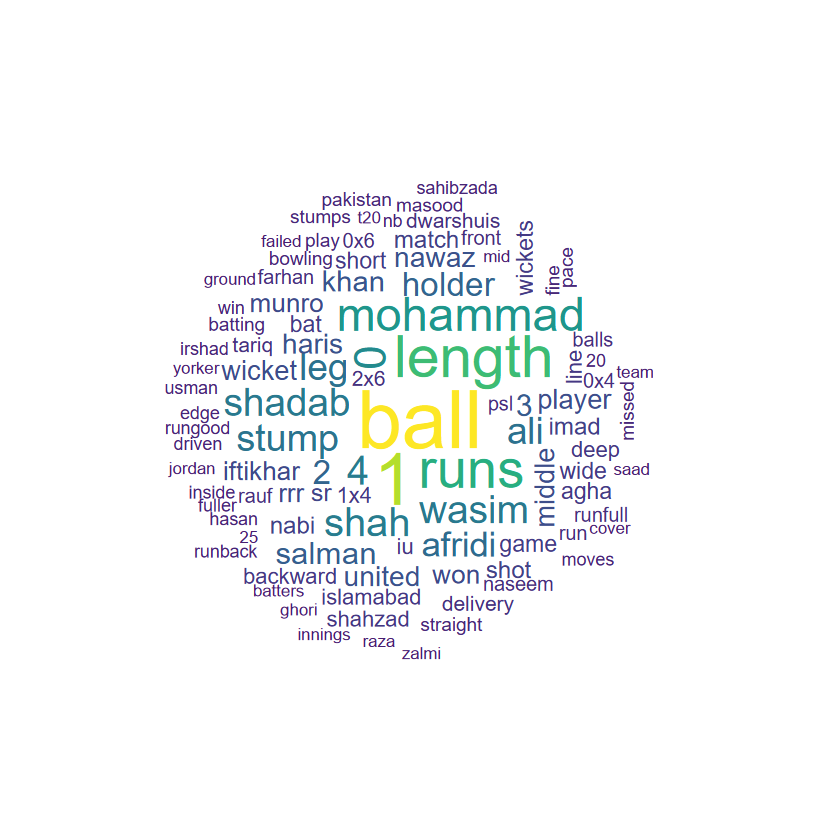

In [23]:
tokens <- commentary_data %>%
  unnest_tokens(word, raw_text) %>%
  anti_join(stop_words, by = "word") %>%
  filter(!is.na(word) & word != "")

if (nrow(tokens) > 0) {
  word_freq <- tokens %>% count(word, sort = TRUE) %>% filter(n > 20)
  wordcloud(words = word_freq$word, freq = word_freq$n, max.words = 100,
            random.order = FALSE, colors = viridis::viridis(100))
  png(file.path(outdir, "psl_commentary_wordcloud.png"), width = 900, height = 600)
  wordcloud(words = word_freq$word, freq = word_freq$n, max.words = 100,
            random.order = FALSE, colors = viridis::viridis(100))
  dev.off()
}

## Research Question 5: Season-wise Average Scores  
- How have average match scores changed across PSL seasons from 2016 to 2025?  
- Do scoring trends indicate more aggressive batting over time?  

---

In [24]:
if (all(c("season", "total_runs", "match_id") %in% names(psl_matches))) {
  match_summary <- psl_matches %>%
    group_by(match_id, season, inning) %>%
    summarise(innings_score = sum(total_runs, na.rm = TRUE), .groups = "drop") %>%
    group_by(season) %>%
    summarise(avg_score = mean(innings_score, na.rm = TRUE), .groups = "drop")
  
  p1 <- ggplot(match_summary, aes(x = factor(season), y = avg_score, group = 1)) +
    geom_line(color = "blue", linewidth = 1.2) +
    geom_point(size = 2, color = "red") +
    labs(title = "Season-wise Average PSL Scores (2016–2025)",
         x = "Season", y = "Average Runs per Match") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
  
  ggsave(file.path(outdir, "psl_avg_scores.png"), plot = p1, width = 8, height = 6, dpi = 300)
}

## Research Question 6: Most Successful Teams (Unique Matches)  
- Which PSL teams have won the most matches between 2016–2025?  
- How does match-winning consistency vary across franchises?  

---

In [25]:
if ("winner" %in% names(psl_matches)) {
  team_wins <- psl_matches %>%
    filter(!is.na(winner) & winner != "") %>%
    distinct(match_id, winner) %>%
    count(winner, name = "wins") %>%
    arrange(desc(wins))
  
  p_team <- ggplot(team_wins, aes(x = reorder(winner, wins), y = wins)) +
    geom_col(fill = "darkblue") +
    coord_flip() +
    scale_y_continuous(expand = c(0,0)) +
    labs(title = "Most Successful PSL Teams (2016–2025)",
         x = "Team", y = "Wins") +
    theme_minimal()
  
  ggsave(file.path(outdir, "psl_team_wins.png"), plot = p_team, width = 8, height = 6, dpi = 300)
}

## Research Question 7: Top Run Scorers  
- Who are the top run scorers in PSL history (2016–2025)?  
- How do leading batters compare in total runs scored?  

---

In [26]:
if (all(c("batter", "batsman_runs") %in% names(psl_matches))) {
  top_batsmen <- psl_matches %>%
    group_by(batter) %>%
    summarise(total_runs = sum(batsman_runs, na.rm = TRUE), .groups = "drop") %>%
    arrange(desc(total_runs)) %>%
    head(15)
  
  p_batsmen <- ggplot(top_batsmen, aes(x = reorder(batter, total_runs), y = total_runs)) +
    geom_col(fill = "darkred") +
    coord_flip() +
    labs(title = "Top 15 Run Scorers (2016–2025)", x = "Batter", y = "Total Runs") +
    theme_minimal()
  
  ggsave(file.path(outdir, "psl_top_batsmen.png"), plot = p_batsmen, width = 8, height = 6, dpi = 300)
}

## Research Question 8: Most Successful Teams by Titles  
- Which teams have secured the most PSL titles between 2016–2025?  
- How does title-winning dominance reflect team strength?  

---

In [27]:
if (all(c("winner", "season", "match_type") %in% names(psl_matches))) {
  titles_summary <- psl_matches %>%
    filter(!is.na(winner) & winner != "" & grepl("Final", match_type, ignore.case = TRUE)) %>%
    distinct(season, winner) %>%
    count(winner, name = "titles") %>%
    arrange(desc(titles))
  
  p_titles <- ggplot(titles_summary, aes(x = reorder(winner, titles), y = titles, fill = winner)) +
    geom_col(show.legend = FALSE) +
    geom_text(aes(label = titles), hjust = -0.3, size = 5, fontface = "bold") +
    coord_flip() +
    scale_y_continuous(expand = c(0,0), breaks = 0:max(titles_summary$titles)) +
    labs(title = "Most Successful PSL Teams by Titles (2016–2025)",
         x = "Team", y = "Titles Won") +
    theme_minimal()
  
  ggsave(file.path(outdir, "psl_titles.png"), plot = p_titles, width = 8, height = 6, dpi = 300)
}

## Research Question 9: Top Wicket Takers  
- Who are the leading wicket-takers in PSL history (2016–2025)?  
- How do they compare in total dismissals achieved?  


In [28]:
if (all(c("bowler", "is_wicket") %in% names(psl_matches))) {
  top_bowlers <- psl_matches %>%
    mutate(is_wicket = suppressWarnings(as.numeric(is_wicket))) %>%
    group_by(bowler) %>%
    summarise(wickets = sum(is_wicket, na.rm = TRUE), .groups = "drop") %>%
    arrange(desc(wickets)) %>%
    head(15)
  
  p_bowl <- ggplot(top_bowlers, aes(x = reorder(bowler, wickets), y = wickets)) +
    geom_col(fill = "darkgreen") +
    coord_flip() +
    labs(title = "Top 15 Wicket Takers (2016–2025)", x = "Bowler", y = "Total Wickets") +
    theme_minimal()
  
  ggsave(file.path(outdir, "psl_top_bowlers.png"), plot = p_bowl, width = 8, height = 6, dpi = 300)
}

## Research Question 10: Player of the Match Leaders  
- Which players have received the most “Player of the Match” awards?  
- Do these awards align with overall batting or bowling dominance?  

---

In [29]:
if ("player_of_match" %in% names(psl_matches)) {
  top_pom <- psl_matches %>%
    filter(!is.na(player_of_match) & player_of_match != "") %>%
    distinct(match_id, player_of_match) %>%
    count(player_of_match, name = "awards") %>%
    arrange(desc(awards)) %>%
    head(10)
  
  p_pom <- ggplot(top_pom, aes(x = reorder(player_of_match, awards), y = awards)) +
    geom_col(fill = "purple") +
    coord_flip() +
    scale_y_continuous(expand = c(0,0), breaks = pretty_breaks()) +
    labs(title = "Top Player of the Match Awards (2016–2025)", x = "Player", y = "Awards") +
    theme_minimal()
  
  ggsave(file.path(outdir, "psl_top_pom.png"), plot = p_pom, width = 8, height = 6, dpi = 300)
}

## Research Question 11: Top Venues by Matches Played  
- Which venues have hosted the most PSL matches?  
- How do these venues contribute to PSL’s history and fan experience?  

---

In [30]:
if ("venue" %in% names(psl_matches)) {
  venue_counts <- psl_matches %>%
    filter(!is.na(venue) & venue != "") %>%
    distinct(match_id, venue) %>%
    count(venue, name = "matches_played") %>%
    arrange(desc(matches_played)) %>%
    head(10)
  
  p_venue <- ggplot(venue_counts, aes(x = reorder(venue, matches_played), y = matches_played)) +
    geom_col(fill = "brown") +
    coord_flip() +
    labs(title = "Top PSL Venues (2016–2025)", x = "Venue", y = "Matches Played") +
    theme_minimal()
  
  ggsave(file.path(outdir, "psl_top_venues.png"), plot = p_venue, width = 8, height = 6, dpi = 300)
}

# 9️⃣ Executive Insights + Visuals

**Purpose:**  
Provide recruiter-ready combined insights:

- Total unique matches 2016–2025  
- Top high-scoring matches  
- Matches where sentiment aligns strongly with runs  
- Over-wise runs heatmap  
- Sentiment vs runs scatter plot  
- Top batsmen performance plot  

**Notes:**  
- Combines commentary, numeric, and player-level analysis  
- Saves CSV of executive insights and all plots as PNGs  
- Integrates wordcloud, over-wise trends, and top performers in one package  
---

In [31]:
insights <- list()
insights[[1]] <- paste0("Total unique matches (2016-2025): ", length(unique(psl_matches$match_id)))

# Top scoring matches
if (exists("match_summary") && nrow(match_summary) > 0) {
  top_matches <- match_summary %>%
    arrange(desc(avg_score)) %>%
    slice_head(n = 3) %>%
    pull(season)   # or another identifying column
  insights[[2]] <- paste0("Top 3 high-scoring matches: ", paste(top_matches, collapse = ", "))
}

# 1️⃣1️⃣ Save All Key CSVs & Plots into a Zip

**Purpose:**  
Package all generated outputs into a single zip file for easy sharing and download:

- Includes all CSVs, PNG plots, and any R Markdown files  
- Ensures recruiters or stakeholders can access all insights in one place  

In [32]:
zipfile <- file.path(outdir, "psl_deep_analysis_outputs.zip")
files_to_zip <- list.files(outdir, pattern = "\\.csv$|\\.png$|\\.Rmd$", full.names = TRUE)
if (length(files_to_zip) > 0) zip::zipr(zipfile, files_to_zip)
message("All outputs saved in: ", normalizePath(outdir), " (zip: ", normalizePath(zipfile), ")")

All outputs saved in: C:\Users\PMLS\psl_analysis_outputs (zip: C:\Users\PMLS\psl_analysis_outputs\psl_deep_analysis_outputs.zip)



## 📇 About the Author  


Written by **[Aleeza Zia](https://www.linkedin.com/in/aleeza-zia27)** · IBM Data Science Professional · Google Certified Data Analytics & Advanced Data Analytics Professional  

<center style="color:gray; font-size:20px;">
  🤞 <b>Good Luck!</b>
</center>